In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

In [12]:
UTILS = '/Users/krishnakalyan3/Educational/PumpIt/code/'
import sys
sys.path.append(UTILS)

In [13]:
# Custom imports
from utils import read_data
from utils import write_data
from param_config import config

In [16]:
# Train Data
train_x = read_data(config.e_xtrain)
train_y = read_data(config.e_ytrain)

# Val Data
val_x = read_data(config.e_xval)
val_y = read_data(config.e_yval)

In [85]:
samples = 40000
clf = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True, 
                           class_weight='balanced')
clf.fit(train_x[:samples], train_y[:samples])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=0.5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [86]:
feature_importance = clf.feature_importances_

In [87]:
importance_list = []
for k,v in zip(train_x.columns, feature_importance):
    importance_list.append((k,v))

In [127]:
importance_list = sorted(importance_list, key=lambda x : x[1], reverse=True)
importance_list

[('longitude', 0.10553521669071504),
 ('latitude', 0.073867606635185615),
 ('quantity_group', 0.063616182145691563),
 ('quantity', 0.057065998003645389),
 ('wpt_name', 0.052782804360293992),
 ('subvillage', 0.049052273715411474),
 ('date_recorded', 0.04491874261112825),
 ('construction_year', 0.039659288007529596),
 ('gps_height', 0.039184695227863879),
 ('ward', 0.032733147181199365),
 ('population', 0.028878377485947643),
 ('day', 0.02826381673969065),
 ('funder', 0.025910484457671079),
 ('waterpoint_type', 0.025175757069214467),
 ('lga', 0.024400187318985779),
 ('waterpoint_type_group', 0.023950928800135381),
 ('extraction_type_class', 0.022764903115088431),
 ('installer', 0.022542431851956771),
 ('scheme_name', 0.020157257678287292),
 ('day_week', 0.01846361686024758),
 ('district_code', 0.018034293829732324),
 ('region', 0.012790323733563504),
 ('source', 0.012523549472880082),
 ('payment', 0.01244358168524104),
 ('amount_tsh', 0.011780848639046312),
 ('payment_type', 0.0115233619

In [128]:
# Make Plots
top_n = 15

In [129]:
imp_var = [k for k, _ in importance_list]
val = [k for _, k in importance_list]

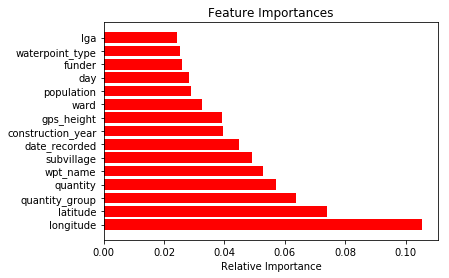

In [133]:
plt.title('Feature Importances')
plt.yticks(range(top_n), imp_var[0:top_n])
plt.xlabel('Relative Importance')
plt.barh(range(top_n), val[0:top_n], color='r', align='center')
plt.show()

In [ ]:
# Check if there is any relation between quantity_group, quantity

In [140]:
np.bincount(train_x['quantity'])

array([ 4976, 26598, 12117,  3206,   623])

In [141]:
np.bincount(train_x['quantity_group'])

array([ 4976, 26598, 12117,  3206,   623])

In [142]:
# Check if there is any relation between wpt_name, subvillage

In [ ]:
# Drop 
## quantity_group (same as quantity)
## id (Unique Id)
## recorded_by (1 Cardinality)

In [ ]:
col:id card:59400
col:funder card:1897
col:installer card:2145
col:wpt_name card:37400
col:subvillage card:19287
col:date_recorded card:356
col:num_private card:65
col:lga card:125
col:ward card:2092

col:region_code card:27

col:region card:21
col:district_code card:20


col:scheme_name card:2696

col:construction_year card:55
col:extraction_type card:18
        
col:extraction_type_group card:13

col:management card:12
col:scheme_management card:12

col:source card:10

col:basin card:9
col:water_quality card:8

col:extraction_type_class card:7
col:payment card:7
col:payment_type card:7
col:source_type card:7
col:waterpoint_type card:7
        
col:quality_group card:6
col:waterpoint_type_group card:6
        
col:quantity card:5
col:quantity_group card:5
col:management_group card:5

col:source_class card:3
        
col:public_meeting card:2
col:permit card:2

col:recorded_by card:1

In [153]:
print(np.bincount(train_x['management']))
print(np.bincount(train_x['scheme_management']))


[  527   662    75  1396  1603    60   454 32462   717  2347  2038  5179]
[  841     1   607  1321   864    78    55 32617  2306  4121  2202  2507]
